# Protocol for identifying bird call times

Here we examine steps in how to identify bird call times (python portion)

In [1]:
# imports
import itertools
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats
import pprint as pp
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

## Step 4: Heat map

In [3]:
cd ../auto_detect

C:\Users\Lauren\Desktop\Summer17\CITI\USBS\auto_detect


In [5]:
detected = sio.loadmat('call_times_3.mat')
s103 = detected['call_time1'][0]
s203 = detected['call_time2'][0]
s303 = detected['call_time3'][0]
s403 = detected['call_time4'][0]
s503 = detected['call_time5'][0]
s603 = detected['call_time6'][0]
s_3 = [s103, s203, s303, s403, s503, s603]

In [6]:
detected = sio.loadmat('call_times_6.mat')
s106 = detected['call_time1'][0]
s206 = detected['call_time2'][0]
s306 = detected['call_time3'][0]
s406 = detected['call_time4'][0]
s506 = detected['call_time5'][0]
s606 = detected['call_time6'][0]
s_6 = [s106, s206, s306, s406, s506, s606]

In [7]:
def min_heat(seg,s):
    num = 120/seg
    bins = np.linspace(start=0,stop=7368,num=num)
    lst = []
    for x in s:
        lst.append([x for x in np.histogram(x, bins)[0]])

    df3 = pd.DataFrame(lst, index=np.arange(1,7), columns=np.arange(1,num))
    import seaborn as sns
    ax = plt.figure(figsize=(25,8))
    ax = sns.heatmap(df3, annot=False, fmt="g", cmap='viridis', cbar_kws={'label': 'bird calls count'})

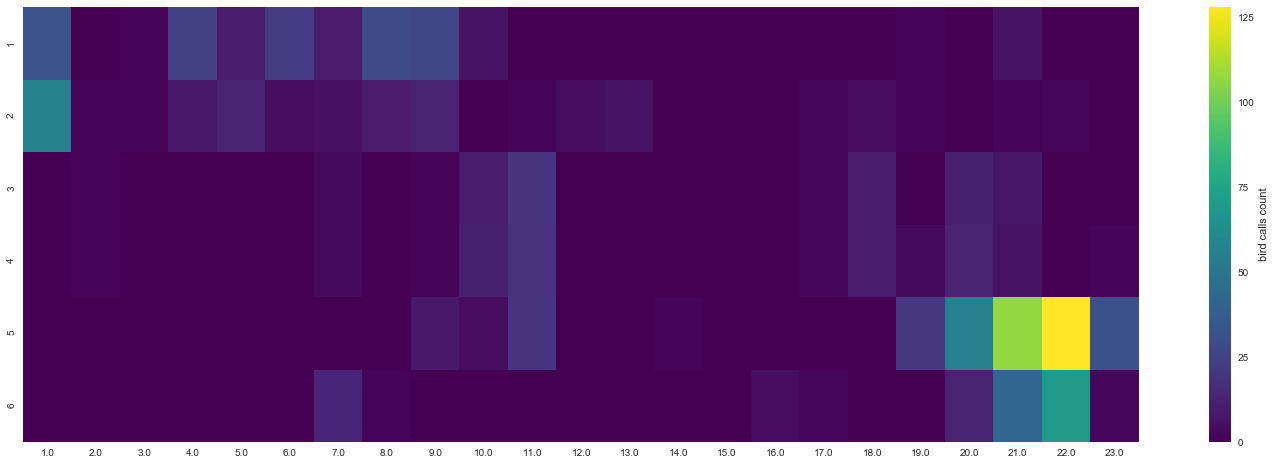

In [8]:
# 5 mins each in 2 hours
# 3 is the morning
min_heat(5,s_3)

## Testing the auto-detector tool

In [ ]:
def bins_acc_rate(obs,tru):
    bins = np.arange(start=0,stop=7368.9, step=0.1)
    count = 0
    fal = 0
    for i in range(len(bins)-1):
        if (obs[i] > 1 or obs[i] == 1) and (tru[i] > 1 or tru[i] == 1):
            count = count+1
        elif (obs[i] > 1 or obs[i] == 1) and tru[i] == 0:
            fal = fal +1
    return count/len(bins), fal/np.count_nonzero(obs)

In [ ]:
def stime_acc_rate(obs, tru):
    #obs_lst = obs.tolist()
    #tru_lst = tru.tolist()
    t = len(tru)
    count = 0
    wrong = 0
    a = False
    w = 5
    for x in obs:
        a = False
        for i in tru:
             if (x < i + w or x == i + w) and (x > i - w or x == i - w):
                count = count +1
                tru.remove(i)
                a = True
        if a == False:
            wrong = wrong +1
            
    return count/t, wrong/len(obs)

In [ ]:
# cd ../auto_detect
def output(mat):
    detected = sio.loadmat(mat)
    d_time0 = detected['call_time0'][0]
    d_time1 = detected['call_time1'][0]
    d_time2 = detected['call_time2'][0]
    d_time3 = detected['call_time3'][0]
    d_time4 = detected['call_time4'][0]
    d_time5 = detected['call_time5'][0]
    d_time6 = detected['call_time6'][0]
    d_time7 = detected['call_time7'][0]
    d_time8 = detected['call_time8'][0]
    d_time9 = detected['call_time9'][0]
    d_time = [d_time0, d_time1, d_time2, d_time3, d_time4, d_time5, d_time6, d_time7, d_time8, d_time9]
    drs = []
    fars = []
    for x in d_time:
        dr, far = stime_acc_rate(x.tolist(),m_time.tolist())
        drs.append(dr)
        fars.append(far)
    plt.plot(drs, fars)
    plt.xlabel("detection rate")
    plt.ylabel("false alarm rate");
    #print(drs, fars)

#### Actual by hand

In [ ]:
cd ../bird_times

In [ ]:
tbl1 = pd.read_table('303_32_3441.txt')
tbl2 = pd.read_table('303_3441_3818.txt')
tbl3 = pd.read_table('303.txt')
tbl303 = pd.concat([tbl1, tbl2, tbl3])
m_time = tbl303['Begin Time (s)']

#### Matching

In [ ]:
val = 0. # this is the value where you want the data to appear on the y-axis.
plt.plot(m_time, np.zeros_like(m_time) + val, 'x')
val = 0.2
plt.plot(d_time1, np.zeros_like(d_time1) + val, 'x')
#plt.plot(d_time1_e, np.zeros_like(d_time1_e) + val, 'x')
#list = 56500:57500;
plt.xlim(5650,5750)
#plt.ylim(0,0.3)
plt.show()